In [1]:
%load_ext autoreload
%autoreload 2 
%matplotlib inline

from lime import lime_image

from unboxer.class_heatmap import ClassHeatmap

Using TensorFlow backend.


In [2]:
cam = ClassHeatmap(model_architecture='vgg16',
                         img_shape=(224,224))

Working on filters: [1]
('guenon', 0.4549621)
('king_penguin', 0.12637396)
('colobus', 0.07697691)
('Appenzeller', 0.074598983)
('EntleBucher', 0.046342622)


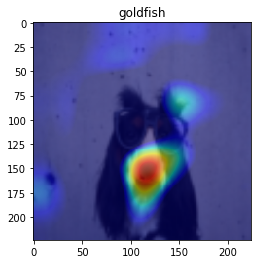

<function unboxer.class_heatmap.ClassHeatmap.plot.<locals>._plot>

In [3]:
IMG_PATH = '/mnt/ml-team/homes/jakub.czakon/.unblackboxing_webinar_data/data/dogs/input/dog_glasses.png'
cam.plot_cam(img_path=IMG_PATH)

Working on filters: [1]
('Brabancon_griffon', 0.14168976)
('Rottweiler', 0.062057398)
('miniature_pinscher', 0.059265751)
('Yorkshire_terrier', 0.056209698)
('Chihuahua', 0.045557328)


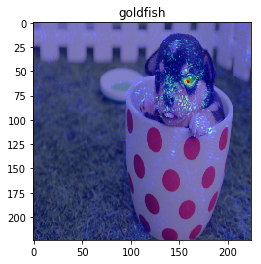

<function unboxer.class_heatmap.ClassHeatmap.plot.<locals>._plot>

In [5]:
cam.plot_saliency(img_path='data/dogs/input/dog_in_a_mug.jpeg')